In [7]:
%matplotlib inline

Classification, Segmentation = 0, 1
ml_types = ['Classification', 'Segmentation']
batch_sizes = [400, 20]

ml_type = Segmentation

version = '0.9'


batch_size=batch_sizes[ml_type]

epochs=500
learning_rate = (10**(-4))*1.5

training=False
resume_training=False

base='/mnt/z9-slide-storage/VipsML'

weights_path=base + '/weights/Vips{}_{}'.format(ml_types[ml_type], version)


In [8]:

import pyvips as Vips
from models import SmallerVGGNet, SegNet
import VipsML

from importlib import reload
reload(VipsML)

if ml_type == Segmentation:
    origs=[Vips.Image.new_from_file(base+'/00-orig.tif')]
    masks=[Vips.Image.new_from_file(base+'/00-mask_6.tif')]
elif ml_type == Classification:
    origs=[Vips.Image.new_from_file(base+'/0'+str(n)+'-orig.tif') for n in range(1,4)]
    masks=[Vips.Image.new_from_file(base+'/0'+str(n)+'-mask.tif') for n in range(1,4)]

models = [SmallerVGGNet, SegNet]
CNNModel = models[ml_type]

image_classes = [VipsML.VipsClassificationML, VipsML.VipsSegmentationML]
ImageClass = image_classes[ml_type]

images = [ImageClass(orig,mask,frame_size=196, padding=30, meta_ratio=3) for orig, mask in zip(origs,masks)]

generator=VipsML.VipsGroupML(images, batch_size=batch_size)

model = CNNModel(generator.input_shape, generator.classes)

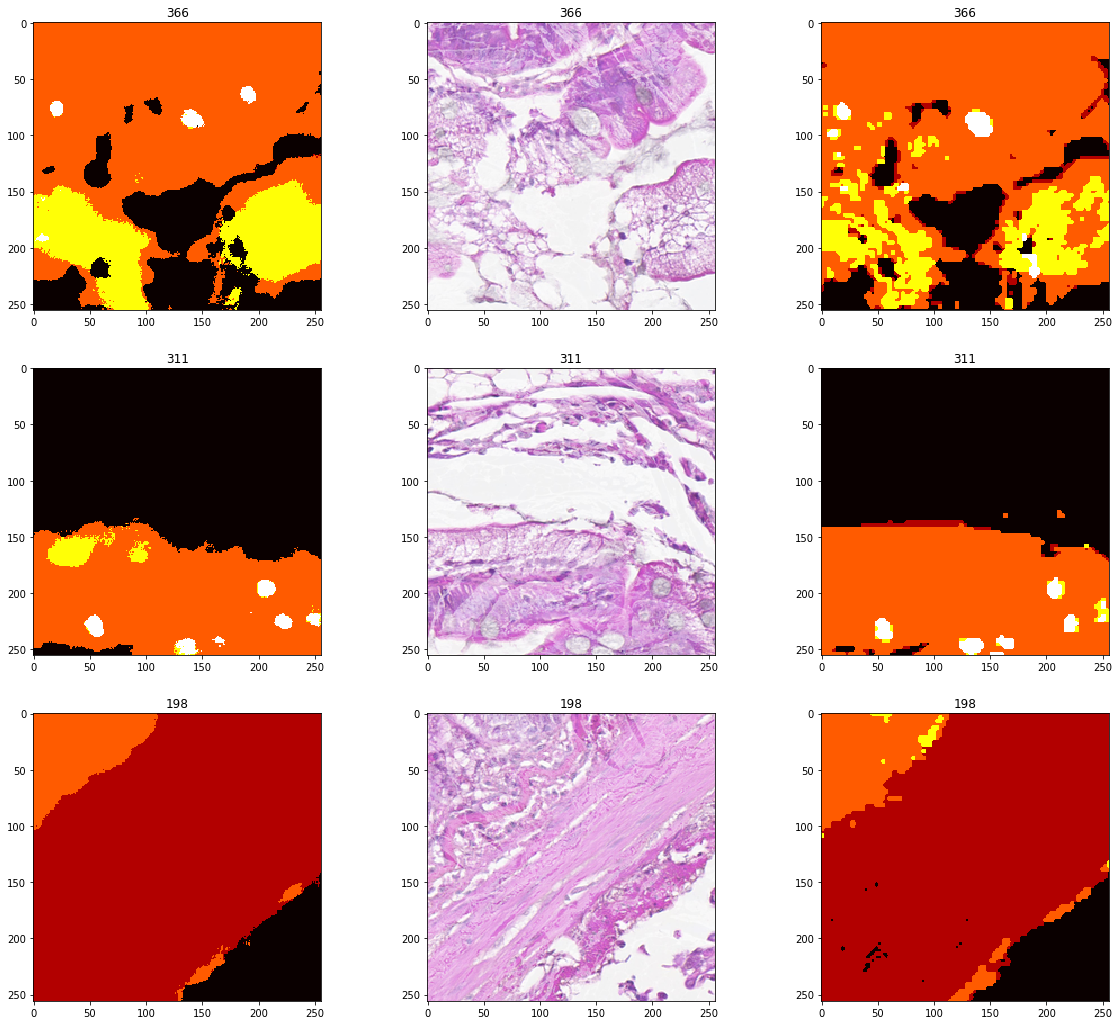

In [9]:
from keras.callbacks import ModelCheckpoint
from matplotlib import pyplot as plt
import numpy as np
from random import choice, shuffle
import tools
from importlib import reload
reload(tools)


from keras.optimizers import SGD
opt = SGD(lr=learning_rate, decay=learning_rate / epochs)

if training:    
    model.compile(loss="categorical_crossentropy", optimizer=opt,
        metrics=["categorical_accuracy"])    
    
    if resume_training:
        model.load_weights(weights_path)    

    checkpointer = ModelCheckpoint(filepath=weights_path + "_tmp", verbose=1,save_best_only=True)
    
    trainer, validator = generator.split_generators(0.1)
    
    H = model.fit_generator(trainer,validation_data=validator,epochs=epochs, callbacks=[checkpointer,tools.Previewer(generator,[366,311,198],"figures/fig_seg0.9_{}.tif")])
    
    model.save(weights_path)
else:
    tools.preview_model(model,generator,[366,311,198],weights_path,labels=True)

In [12]:

from importlib import reload
#import models
#import VipsML
reload(VipsML)
#reload(models)

whole=Vips.Image.new_from_file(base+'/00-orig.tif')
s2=ImageClass(whole, frame_size=256, padding=0, meta_ratio=3)
model = CNNModel(s2.input_shape, 5)
model.load_weights(weights_path ) 
#s2=VipsML2.VipsSegmentationML(whole)
im=s2.predict_model(model, batch_size=batch_size)


100%|██████████| 27/27 [00:22<00:00,  1.39it/s]


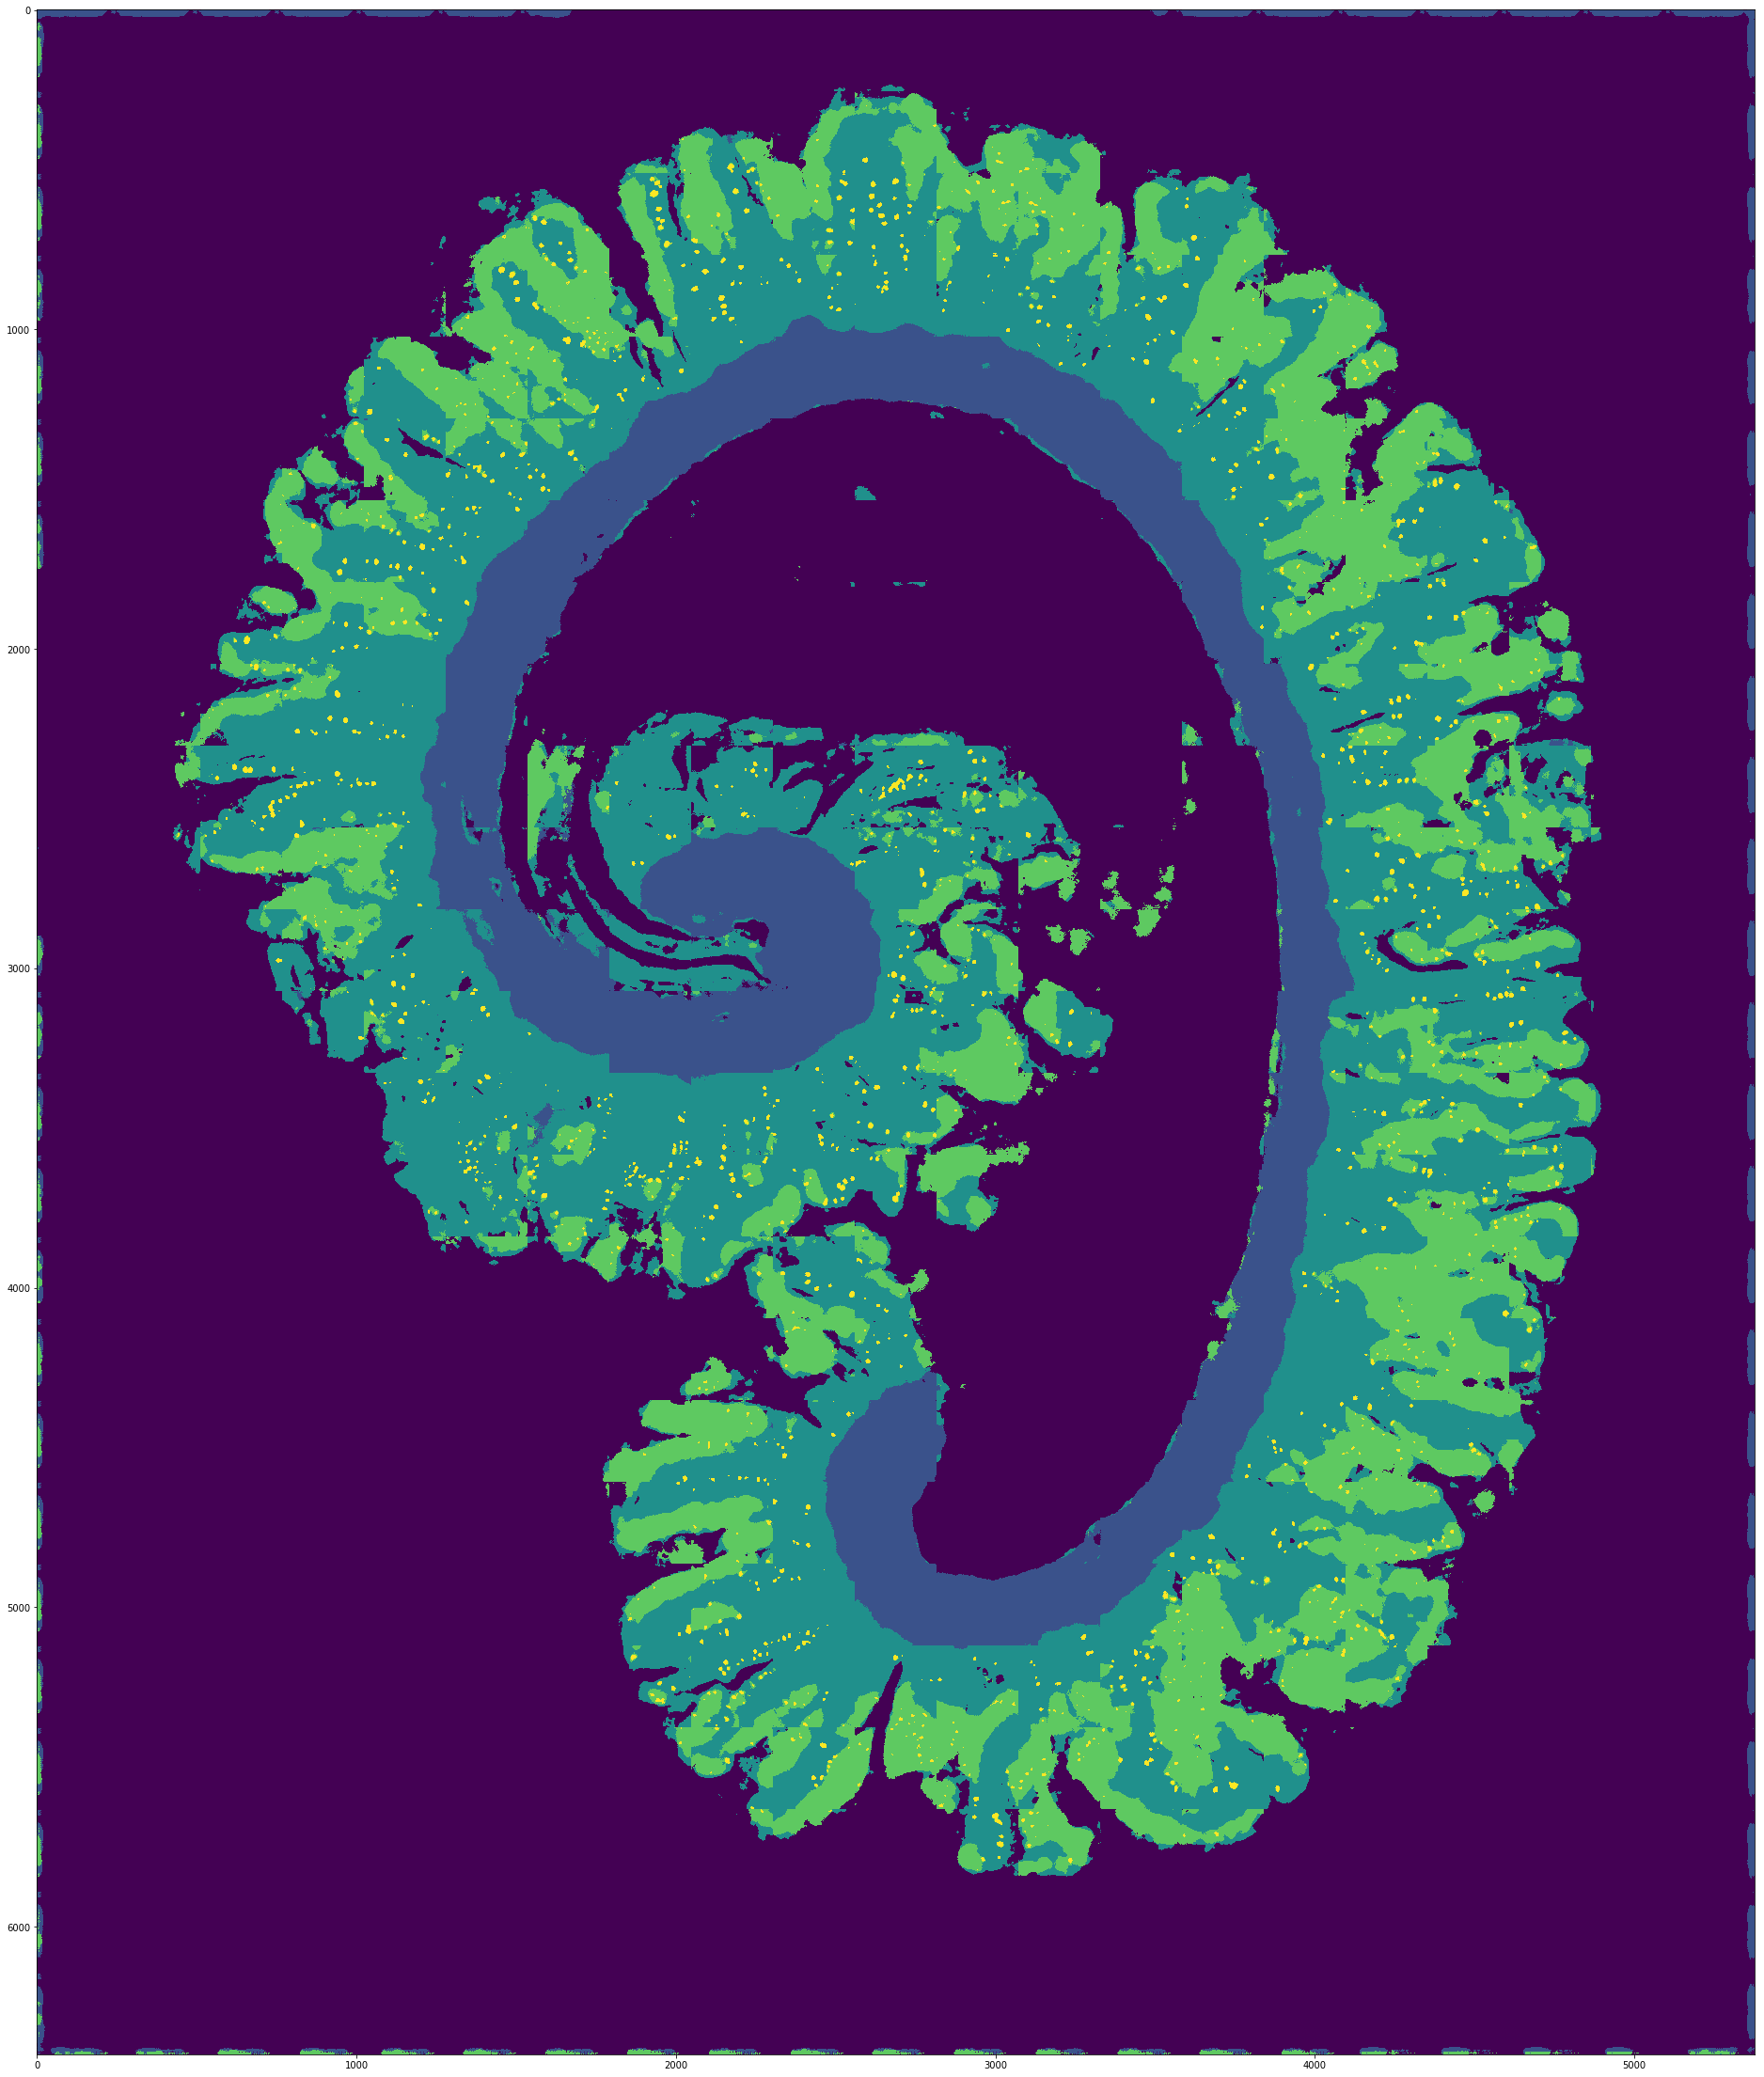

In [13]:
import numpy as np
from numpy import histogram
from numpy import frombuffer, uint32, uint8,float32, squeeze
from matplotlib.pyplot import imshow, figure
from PIL import Image
figure(figsize=(40,40))
#imsave(base+'/../00-mask_2.tif',im.astype(np.uint8))
#pim = Image.fromarray(im.astype(np.uint8), mode='P')
#pim.save(base+'/test-392_9.tif')

imshow(im.astype(np.uint8))

In [35]:

from importlib import reload
reload(tools)
ori=Vips.Image.new_from_file(base+'/00-orig.tif')
da=tools.resize_indexed(Vips.Image.new_from_file(base+'/00-mask_t.tif'),ori.width,ori.height)
da.write_to_file(base+'/00-mask_6.tif')

In [62]:
tools.resize_indexed(masks[0],origs[0].width,origs[0].height).write_to_file(00-mask_)

<pyvips.Image 5266x6306 uchar, 1 bands, multiband>

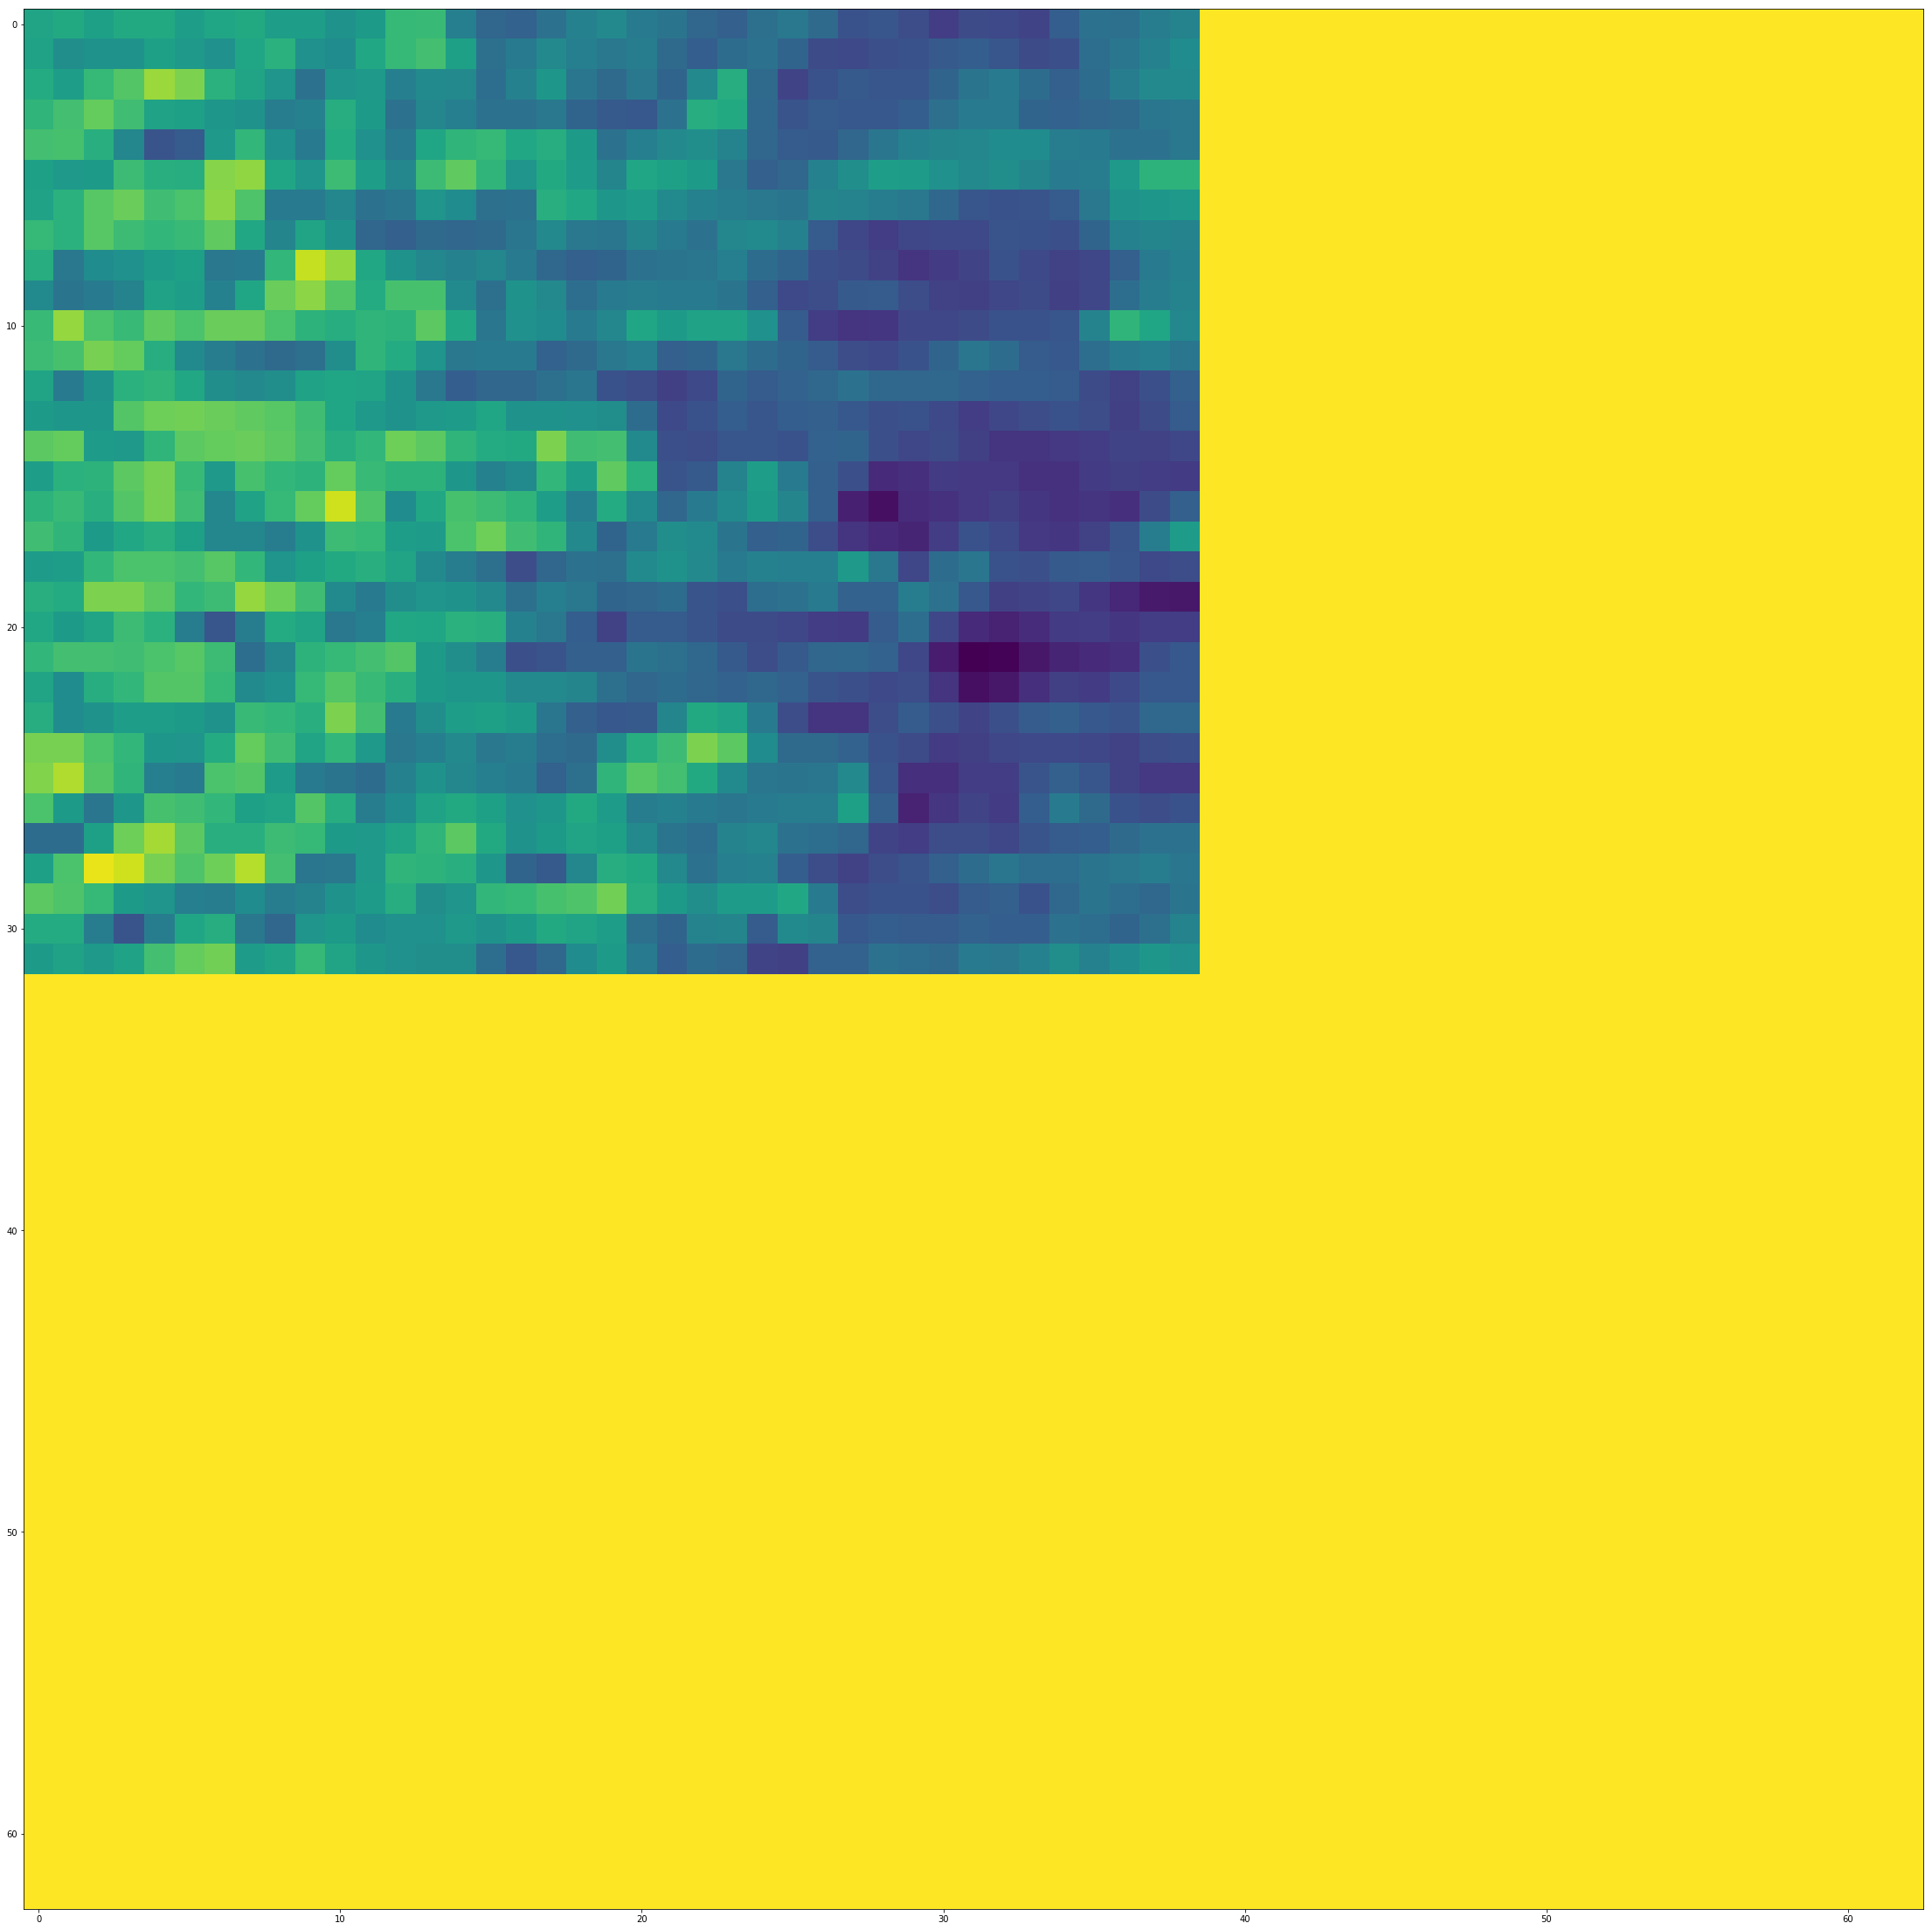

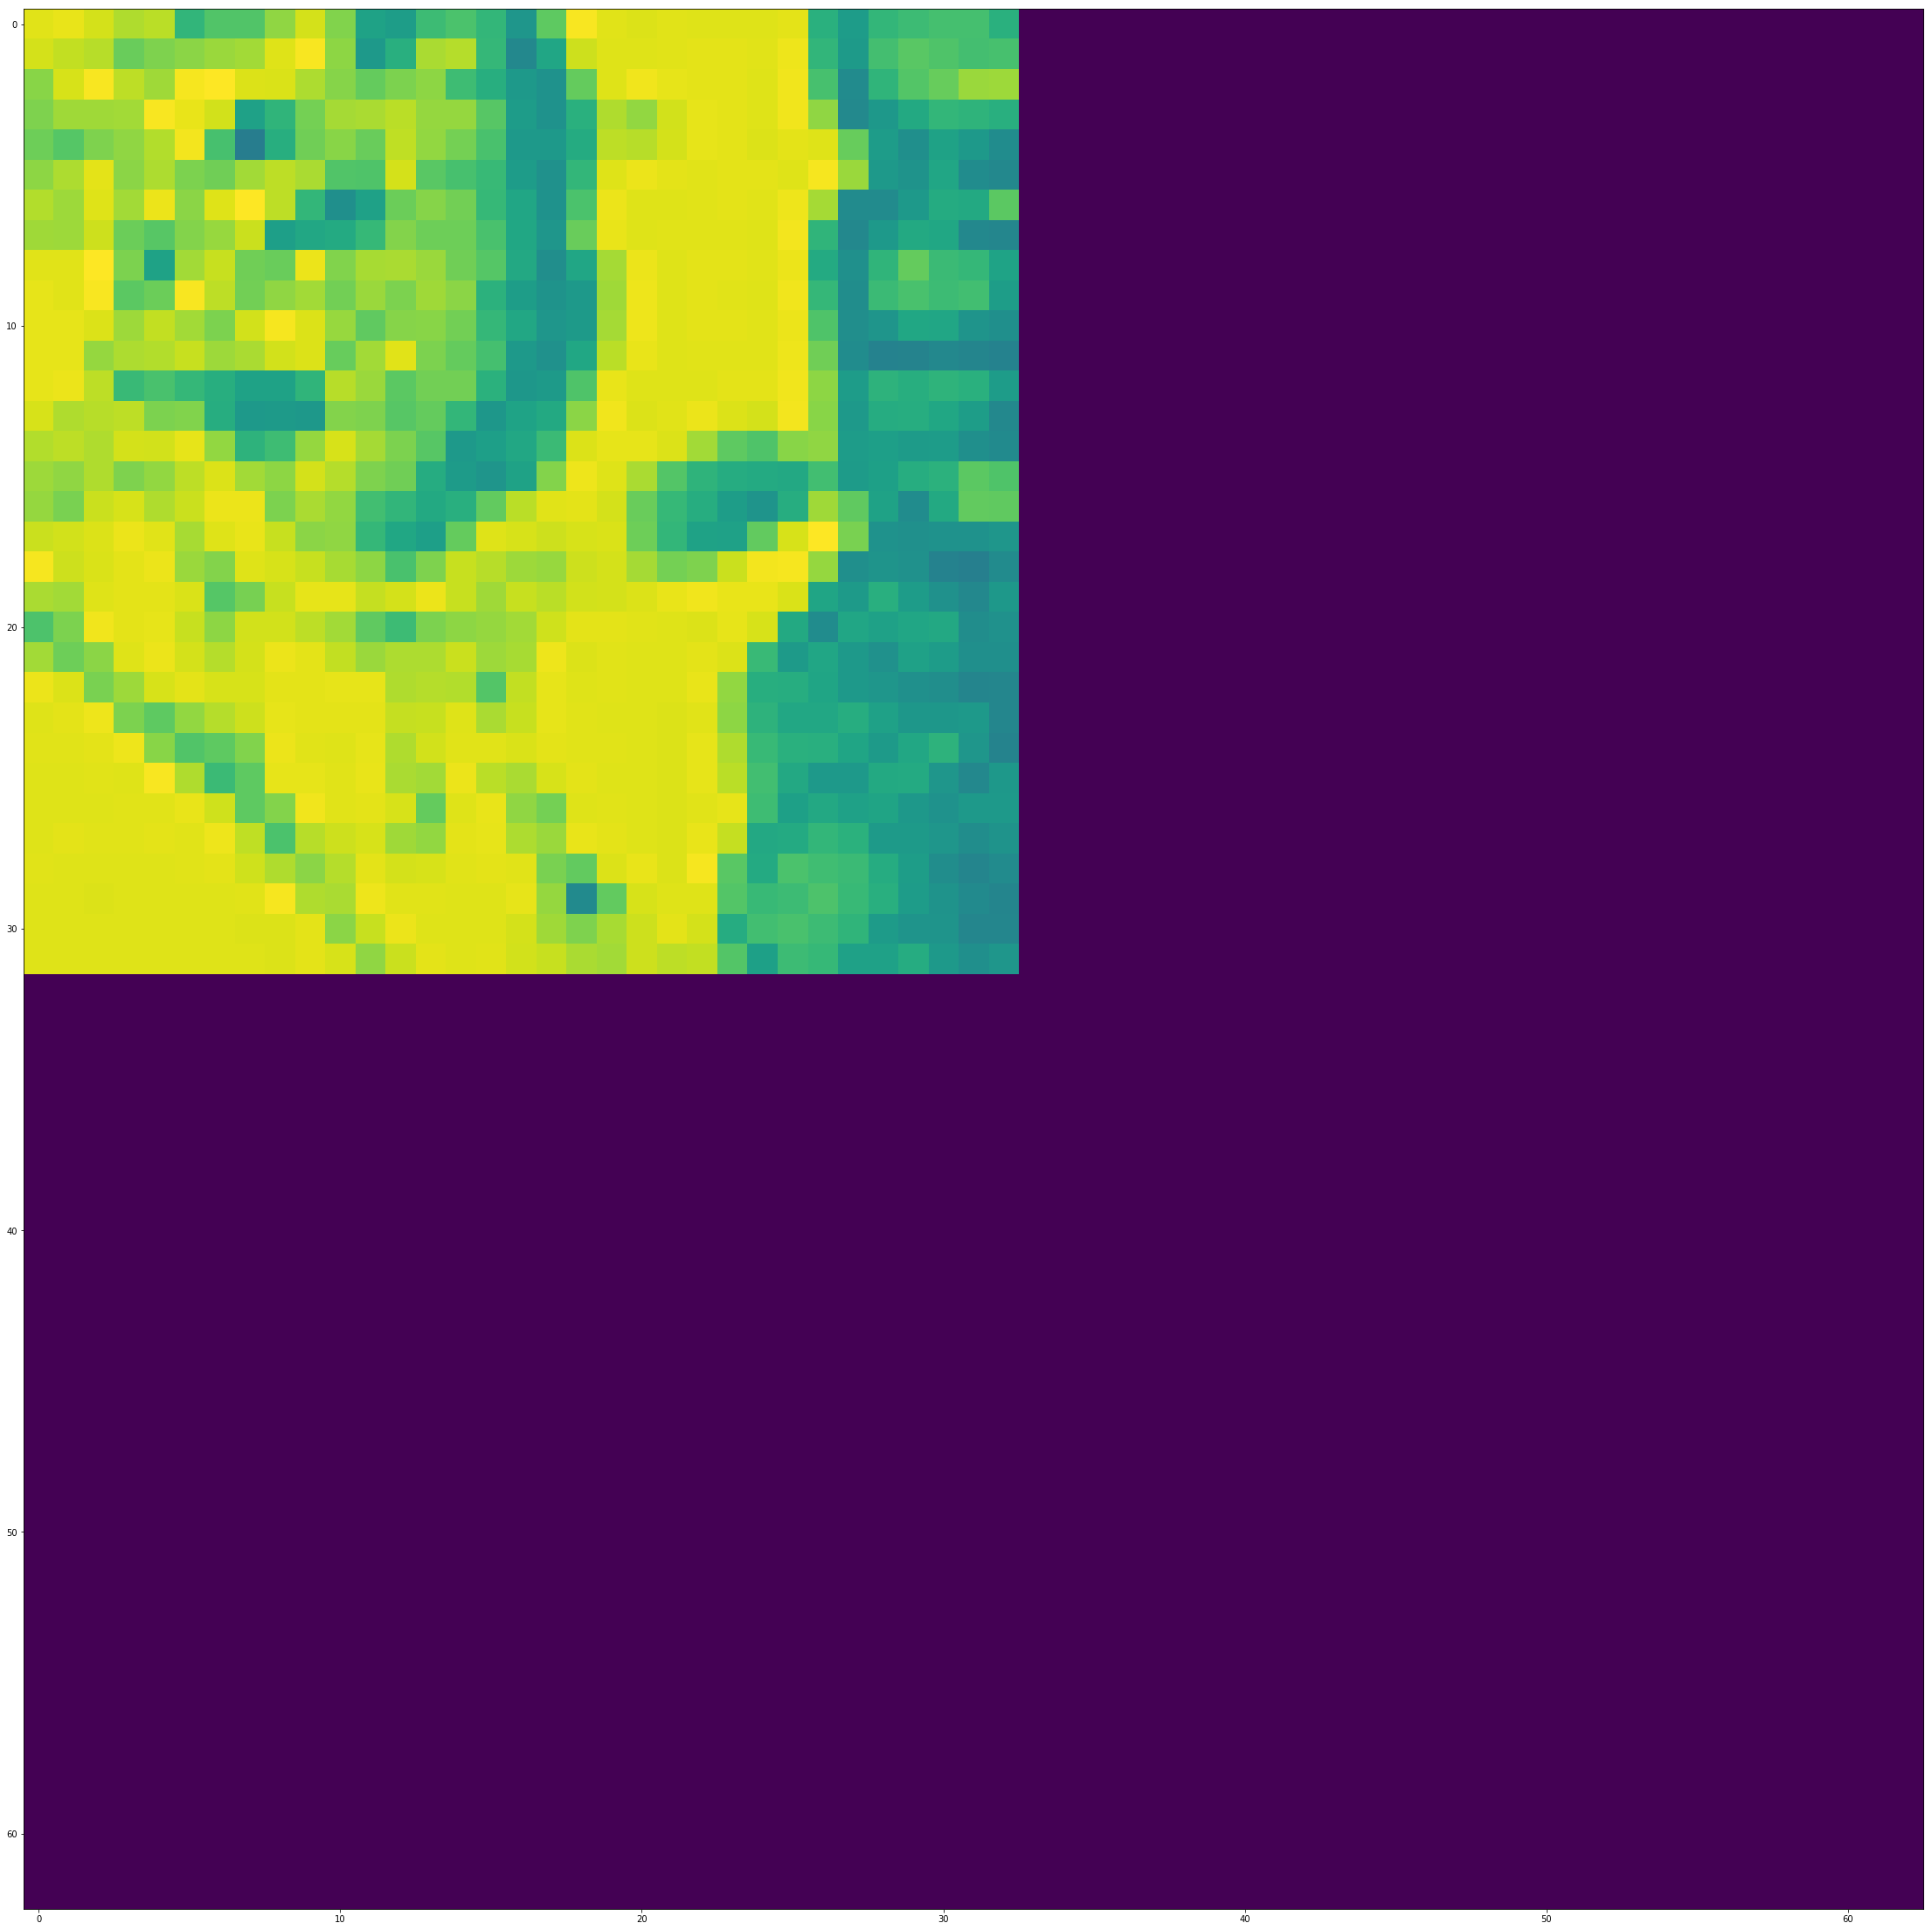

In [49]:
import VipsML
import tools

from importlib import reload
reload(VipsML)
image_classes = [VipsML.VipsClassificationML, VipsML.VipsSegmentationML]
ImageClass = image_classes[ml_type]
gen=ImageClass(origs[0],padding=30,meta_ratio=5) 
px=gen.get_single(gen.total_frames-3)
tools.show_np_im(px[:,:,0])
tools.show_np_im(px[:,:,3])